<a href="https://colab.research.google.com/github/ChandraShekhar-CSR/AI-and-ML/blob/main/Worksheet_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of MCP Neuron for AND and OR Function.

In [4]:
from os import stat
def MCP_Neurons_AND(X1, X2, T):
  """
  This functions implements basic AND operations with MCP Neuron for two inputs.
  Arguments:
  Inputs:
  X1 (1 nd array): An array of binary values.
  X2 (1 nd array): An array of binary values.
  Output:
  state_neuron(1D-list): An state of neuron 1 0r 0 for the particular inputs.
  """
  assert len(X1) == len(X2)
  ### YOUR CODE HERE ###
  # Perform an element wise addition of two input arrays stored in a new array(list):
  # Create a new array to put all the prediction let's name that a state_neuron.
  # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.
  state_neuron = []
  for ele1, ele2 in zip(X1, X2):
    if ele1 + ele2 >= T:
      state_neuron.append(1)
    else:
      state_neuron.append(0)
  return state_neuron

In [5]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2  # Threshold value

# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)

# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")


Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


In [7]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations with MCP Neuron for two inputs.
    Arguments:
    Inputs:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    Output:
    state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2)
    ### YOUR CODE HERE ###

    # Create a new array to put all the prediction let's name that a state_neuron.
    # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.
    state_neuron = []
    for ele1, ele2 in zip(X1, X2):
      if ele1 + ele2 >= T:
        state_neuron.append(1)
      else:
        state_neuron.append(0)
    return state_neuron


In [8]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1  # Threshold value for OR gate

# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)

# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")


Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Implementation for 0 Vs. 1 Classification.

## Step 1: Load the Dataset

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df_0_1 = pd.read_csv("/content/drive/MyDrive/AI and ML/Worksheet3/mnist_0_and_1.csv")  # Add the correct file path if necessary

# Extract features and labels
X = df_0_1.drop(columns=["label"]).values  # 784 pixels
y = df_0_1["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


### Viewing the Dataset.

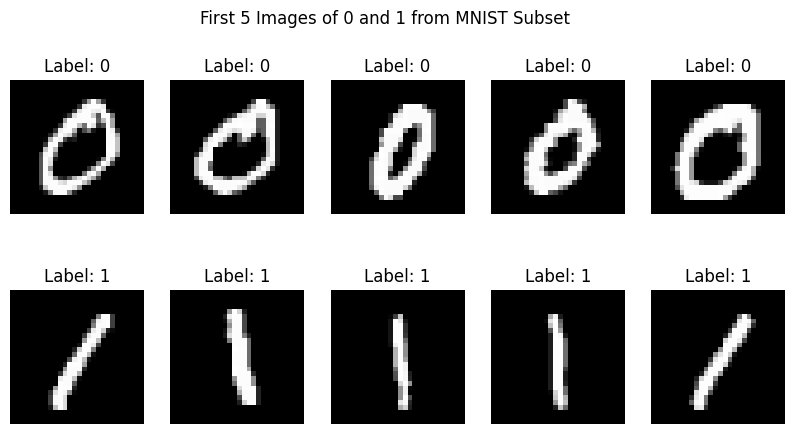

In [12]:
# Separate images for label 0 and label 1
images_0 = X[y == 0]  # Get all images with label 0
images_1 = X[y == 1]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()

## Step - 2 - Initializing the Weights:

In [13]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

## Step - 3 - Make a Decision function:

In [15]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    #####Your Code Here############  # Activation function (step function)
    y_pred_all = np.where(predictions >= 0, 1, 0)
    return y_pred_all

## Step - 3 - Implement the Perceptron Learning Algorithm

In [17]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct prediction.
    """
    # Step 3: Perceptron Learning Algorithm
    # Your Code here#
    for epoch in range(epochs):
      correct_predictions = 0
      for i in range(len(X)):
        predictions = decision_function(X[i], weights, bias)
        error = y[i] - predictions

        weights += learning_rate * error * X[i]
        bias += learning_rate * error

        if error == 0:
          correct_predictions += 1
      accuracy = correct_predictions / len(X)

      if (epoch+1)% 10 ==0:
        print(f"Epoch {epoch+1},Accuracy = {accuracy:.4f}")
      return weights, bias, accuracy

## Training the Perceptron

In [18]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

The Final Accuracy is:  0.9966837741808132


## Step 5: Visualize Misclassified Images

Final Accuracy: 0.9989


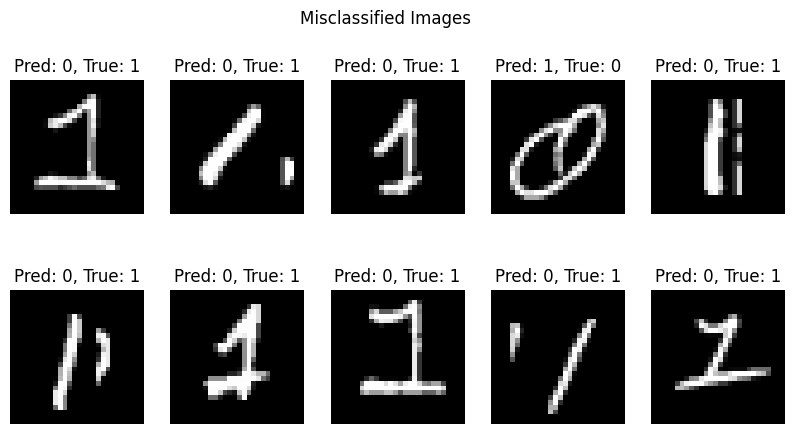

In [19]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_3_5 = pd.read_csv("/content/drive/MyDrive/AI and ML/Worksheet3/mnist_3_and_5.csv")

x = df_3_5.drop(columns=["label"]).values
y = df_3_5["label"].values

print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)

Feature matrix shape: (12665, 784)
Label vector shape: (2741,)


Viewing the dataset

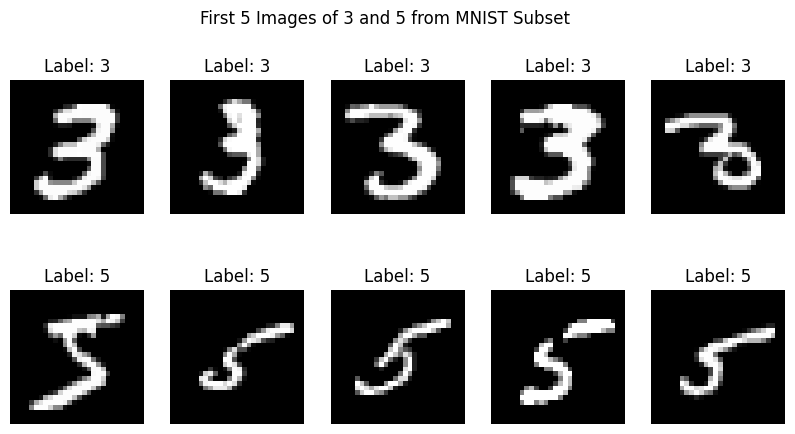

In [24]:
# Separate images for label 0 and label 1
images_3 = x[y==3]
images_5 = x[y==5]

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_3) < 5 or len(images_5) < 5:
    print("Error: Not enough images in images_3 or images_5 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 3
        axes[0, i].imshow(images_3[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 3")
        axes[0, i].axis("off")
        # Plot digit 5
        axes[1, i].imshow(images_5[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 5")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 3 and 5 from MNIST Subset")
    plt.show()

Initializing weight and bias

In [25]:
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

In [26]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    y_pred_all = np.where(predictions >= 0,5,3 ) # Activation function (step function)

    return y_pred_all

In [31]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct prediction.
    """
    # Step 3: Perceptron Learning Algorithm
    # Your Code here#
    for epoch in range(epochs):
      correct_predictions = 0
      # Fix: Change len(X) to min(len(X), len(y))
      # to ensure we don't go beyond the bounds of y.
      for i in range(min(len(X), len(y))):
        predictions = decision_function(X[i], weights, bias)
        error = y[i] - predictions

        weights += learning_rate * error * X[i]
        bias += learning_rate * error

        if error == 0:
          correct_predictions += 1
      accuracy = correct_predictions / len(X)

      if (epoch+1)% 10 ==0:
        print(f"Epoch {epoch+1},Accuracy = {accuracy:.4f}")
    return weights, bias, accuracy

In [32]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

Epoch 10,Accuracy = 0.1147
Epoch 20,Accuracy = 0.1120
Epoch 30,Accuracy = 0.1146
Epoch 40,Accuracy = 0.1162
Epoch 50,Accuracy = 0.1173
Epoch 60,Accuracy = 0.1150
Epoch 70,Accuracy = 0.1172
Epoch 80,Accuracy = 0.1181
Epoch 90,Accuracy = 0.1169
Epoch 100,Accuracy = 0.1194
The Final Accuracy is:  0.11938412949072247


Final Accuracy: 0.5279


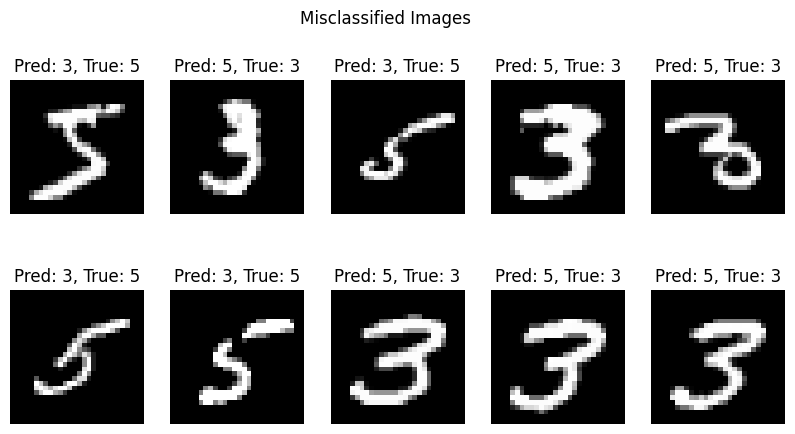

In [35]:
# Get predictions for all data points
predictions = np.dot(x, weights) + bias
y_pred = np.where(predictions >= 0, 5, 3)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(x[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

Question - 1:

List out all the limitations of MCP - Neurons.

>Limitations of MCP – Neurons:

• Can only be used for binary classification.

• Cannot be used to classi?y non-linearly separable values.

• There is no feature learning

• It is limited to a single hidden layer.


• Question - 2: Think if you can develop a logic to solve for XOR function using MCP Neuron.
{Can you devise a if else rules.}

>MCP neuron is used to predict linearly separable values. However XOR has non-
linear separation. Thus it cannot be used to predict for XOR function.

>We can develop a logic for solving an XOR function using two MCP neurons

• Neuron 1- computing OR

• Neuron 2 - computing AND

• Final XOR output - Neuron 1 and (not Neuron-2)

def xor_using_mcp(x1, x2):
#Neuron 1: OR gate
Z1 = 1 if (x1 == 1 or x2 == 1) else 0

#Neuron 2: AND gate
Z2 = 1 if (x1 == 1 and x2 == 1) else 0

#Final XOR: Z1 AND NOT(Z2)
XOR_output = 1 if (Z1 == 1 and Z2 == 0) else 0
return XOR_output

Question - 1: What does the shape of X represent?

> The shape of X represents the total number of samples and the total number of features the dataset.

Question - 2: What does the shape of X represent?

> The shape of Y represents the label vectors. 1 column of the total number of samples.

Question - 3: What does the weights array represent in this context?

>The weights array represents the importance of corresponding features in making
the prediction. These weights are updated during the training process with gradient descent to minimize the loss function.

Question - 4: Why are we initializing the weights to zero? What e`ect could this
have on the training process?

>We initialize the weights to zero to avoid any initial bias towards any features as in providing a neutral starting point to the neurons. However, this might cause all the neurons in the same layer to learn the same updates (updates on weights) causing symmetry problems.

Question - 5: What is the purpose of the output = np.dot(X[i], weights) + bias line?
> The line calculates the weighted sum of inputs and adding a bias. This helps
determine the model’s prediction before applying an activation function.

Question - 6: What happens when the prediction is wrong? How are the weights and
bias updated?
> When the prediction is wrong, we use an optimization function, mostly gradient
decent to update the weights and biases to decrease the loss.

Update process:

Error = y^ - y

Where y^ is the predicted output

And y is the actual output

Updated_weight = weight + (learning rate * Error * corresponding feature)

updated_bias = bias + ( learning rate * Error )

Question - 7:Why is the final accuracy important, and what do you expect it to be?
> The final accuracy is important as it gives uss the measure of how well the model predicts the data on the dataset. A well trained model has higher accuracy, meaning that it generalizes the prediction. A proor model has low accuracy.

> For critical measures such as prediction in medical fields the acuuracy should be
higher and near perfect while some prediction like spam emails can have above
80% acurracy. However, the higher the better.

Question - 8:What does misclassified idx store, and how is it used in this code?
> Missclassified idx stores the value of index of the images that were incorrectly classified. It is used to visualize the missiclassied images ccessed throught their index.

Question - 9: How do you interpret the result if the output is ”All images were
correctly classified!”?

>The output “All images were correctly classified!” means that the model made no
mistakes in predicting 0s as 0s and 1s as 1s. The model is absolutely accurate.